<span style="color:gray">Интеллектуальный анализ данных в R и Python. Лекция 6</span>

### 7.  Обучение с учителем. Случайный лес.

<font color='blue'>Случайный лес</font> (Random Forest) реализован в функции [`sklearn.ensemble.RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Случайный лес генерирует ансамбль деревьев решений (desicion trees) и улучшает их прогноз. Каждое дерево построено на случайном (повторяющем) подмножестве обучающей выборки, и каждое дерево всегда выбирается случайным подмножеством признаков для каждого узла.

Параметр `n_estimators` регулирует количество деревьев, тогда как параметр `max_features` задает максимальное количество случайно выбранных объектов, которые учитываются при построении каждого узла. Параметр `max_depth` учитывает максимальную глубину дерева в ансамбле. Каждое дерево строится независимо, поэтому алгоритм может быть легко распараллелен - параметр `n_jobs` контролирует, сколько ядер процессора будет использовано для обучения (значение -1 указывает на использование всех ядер). Для получения более подробной информации см. [1.11.2. Forests of randomized trees](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) `scikit-learn` документации.




In [7]:
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

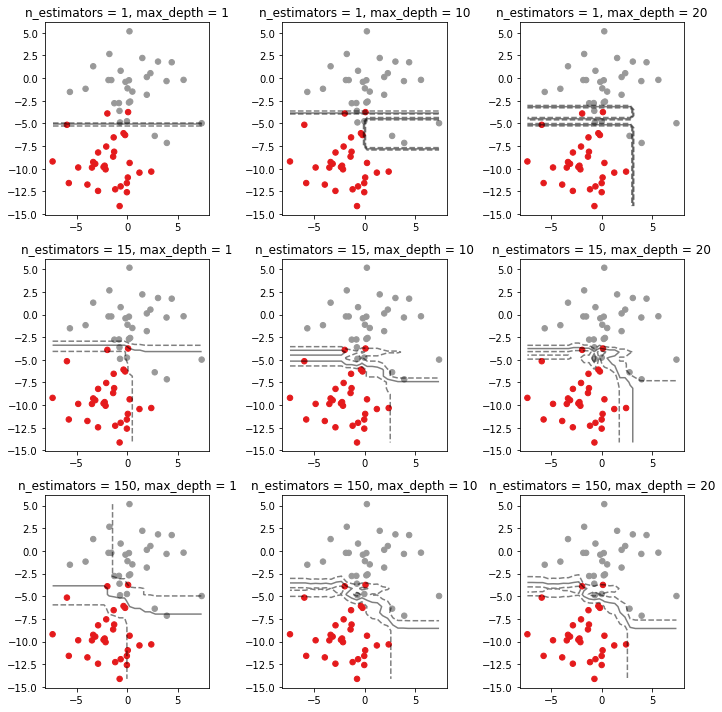

In [8]:
def calculate_decision_function(X,model):
    '''
    Create a 2D grid to evaluate model.
    '''

    xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
    yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model(xy).reshape(XX.shape)

    return (XX,YY,Z)

# генерируем 60 примеров
X, y = make_blobs(n_samples=60, centers=2, cluster_std=2.5, random_state=2)
#X, y = make_blobs(n_samples=90, centers=2, cluster_std=2.5, random_state=2)
#X, y = make_blobs(n_samples=90, centers=2, cluster_std=3.5, random_state=2)

fig, ax = plt.subplots(3, 3, figsize=(10, 10))

#for i,n_estimators in enumerate([1,10,100]):
#    for j,max_depth in enumerate([1,5,10]):

for i,n_estimators in enumerate([1,15,150]):
    for j,max_depth in enumerate([1,10,20]):
          
        model = Pipeline([('RF', RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth))]) 
        model.fit(X, y)

        ax[i][j].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Set1)

        # Plotanje vjerojatnosti pripadnosti klasama
        (XX,YY,Z) = calculate_decision_function(X, lambda x: model.predict_proba(x)[:,0])
        CS = ax[i][j].contour(XX, YY, Z, colors='k', levels=[0.3, 0.5, 0.7], alpha=0.5, linestyles=['--', '-', '--'])

        ax[i][j].set(title='n_estimators = ' + str(n_estimators) + ', max_depth = ' + str(max_depth))

fig.tight_layout();

<font color='green'>Задание для самостоятельной работы:</font>

1. Реализовать алгоритм случайного леса на реальном наборе данных, запуская ячейки в данном Jupyter Notebook и меняя значения параметров модели. 
1. Создать ячейку и написать пояснение, как параметры модели `n_estimators` и `max_depth` влияют на качество модели. 
1. Загрузить результирующий .ipynb файл в папку /assignments/. Файлы должны именоваться как:<br>
   *'Lecture_6_' + surname*.

#### Влияние параметров `n_estimators` и `max_depth`

Исходя из итеративных показателей графиков: увеличение данных параметров как и в случае с параметрами $C$ и $\gamma$  для метода опорных векторов увеличивает точность модели до некоторого порога, после которого увеличение параметров будет уже уменьшать точность модели.